# Practice 3: my first tensorflow network
Your ultimate task for this week is to build your first neural network [almost] from scratch and pure tensorflow.

This time you will same digit recognition problem, but at a larger scale
* images are now 28x28
* 10 different digits
* 50k samples

Note that you are not required to build 152-layer monsters here. A 2-layer (one hidden, one output) NN should already have ive you an edge over logistic regression.

__[bonus score]__
If you've already beaten logistic regression with a two-layer net, but enthusiasm still ain't gone, you can try improving the test accuracy even further! The milestones would be 95%/97.5%/98.5% accuraсy on test set.

__SPOILER!__
At the end of the notebook you will find a few tips and frequently made mistakes. If you feel enough might to shoot yourself in the foot without external assistance, we encourage you to do so, but if you encounter any unsurpassable issues, please do look there before mailing us.

In [8]:
import tensorflow as tf
print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

2.2.0


In [34]:
mnist = tf.keras.datasets.mnist

# [down]loading the original MNIST dataset.
# Please note that you should only train your NN on _train sample,
#  _val can be used to evaluate out-of-sample error, compare models or perform early-stopping
#  _test should be hidden under a rock untill final evaluation... But we both know it is near impossible to catch you evaluating on it.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.0
X_test  = X_test  / 255.0

print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


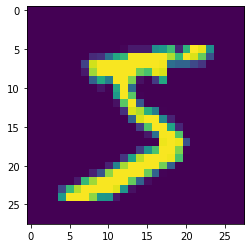

In [35]:
plt.imshow(X_train[0, :,:])

In [32]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.996):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

model = tf.keras.models.Sequential(
    [tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation = tf.nn.relu),
     tf.keras.layers.Dense(64, activation = tf.nn.relu),
     tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch = 30
model.fit(X_train, 
          y_train, 
          epochs=Epoch, 
          callbacks=[myCallback()])
model.evaluate(X_test, y_test)

Epoch 1/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2380 - accuracy: 0.9310
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0995 - accuracy: 0.9704
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0720 - accuracy: 0.9775
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0550 - accuracy: 0.9827
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0424 - accuracy: 0.9863
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0354 - accuracy: 0.9884
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0285 - accuracy: 0.9905
Epoch 8/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0230 - accuracy: 0.9924
Epoch 9/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0221 - accuracy: 0.9920
Epoch 10/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.019

[0.11330655217170715, 0.979200005531311]

Using Conv Nets, yields Better approximation


In [2]:
# Conv Net = Better approximation

import tensorflow as tf
print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.996):
      print("\n Reached 99.6% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255.0
X_train = X_train.reshape(60000, 28, 28, 1)

X_test  = X_test  / 255.0
X_test  = X_test.reshape(10000, 28, 28, 1)

2.2.0


In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(X_train, y_train, 
          epochs=10, callbacks=[myCallback()])

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1442 - accuracy: 0.9571
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0472 - accuracy: 0.9858
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0320 - accuracy: 0.9896
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0238 - accuracy: 0.9926
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0172 - accuracy: 0.9944
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0148 - accuracy: 0.9951
Epoch 7/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.0105 - accuracy: 0.9965
 Reached 99.6% accuracy so cancelling training!
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0105 - accuracy: 0.9964


In [4]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0362 - accuracy: 0.9895
Test loss:  0.0362049899995327
Test accuracy:  0.9894999861717224


[5.4369192e-10 2.0259451e-07 2.2153328e-10 2.0871562e-07 2.4836308e-10
 2.0835542e-11 5.9884245e-16 9.9999952e-01 1.5908522e-10 8.4382705e-08] 7 7


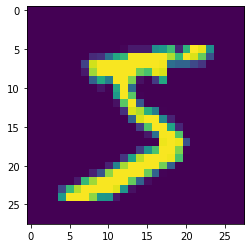

In [6]:
f = model.predict(X_test)

k = 0
print(f[k], np.argmax(f[k]), y_test[k])
plt.imshow(X_train[k, :, :, 0])

```

```

```

```

```

```


# SPOILERS!

Recommended pipeline

* Adapt logistic regression from previous assignment to classify some number against others (e.g. zero vs nonzero)
* Generalize it to multiclass logistic regression.
  - Either try to remember lecture 0 or google it.
  - Instead of weight vector you'll have to use matrix (feature_id x class_id)
  - softmax (exp over sum of exps) can implemented manually or as T.nnet.softmax (stable)
  - probably better to use STOCHASTIC gradient descent (minibatch)
    - in which case sample should probably be shuffled (or use random subsamples on each iteration)
* Add a hidden layer. Now your logistic regression uses hidden neurons instead of inputs.
  - Hidden layer uses the same math as output layer (ex-logistic regression), but uses some nonlinearity (sigmoid) instead of softmax
  - You need to train both layers, not just output layer :)
  - Do not initialize layers with zeros (due to symmetry effects). A gaussian noize with small sigma will do.
  - 50 hidden neurons and a sigmoid nonlinearity will do for a start. Many ways to improve. 
  - In ideal casae this totals to 2 .dot's, 1 softmax and 1 sigmoid
  - __make sure this neural network works better than logistic regression__
  
* Now's the time to try improving the network. Consider layers (size, neuron count),  nonlinearities, optimization methods, initialization - whatever you want, but please avoid convolutions for now.